In [1]:
%matplotlib notebook
import h5py
import numpy as np
import matplotlib.pyplot as plt

### load data

In [2]:
scan = 11 #(4, 10, 11)
frame = 5

filename = h5py.File('%06u.h5' % scan, 'r')
data = np.array(filename['entry/measurement/pilatus/%06u' % frame][:, :, :200])
data_avg = np.average(data,axis=0)
print data.shape

(100, 195, 200)


### check direct beam

<IPython.core.display.Javascript object>


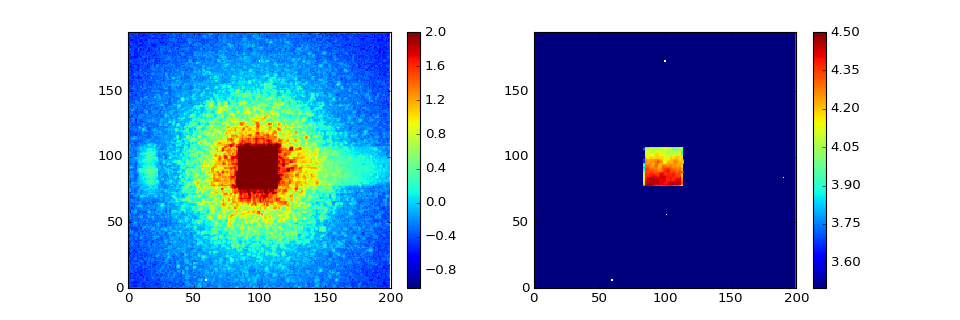

/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10


In [3]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.imshow(np.log10(data_avg), vmin=-1, vmax=2, interpolation='None')
plt.xlim(0,200)
plt.ylim(0,195)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(np.log10(data_avg), vmin=3.5, vmax=4.5, interpolation='None')
plt.xlim(0,200)
plt.ylim(0,195)
plt.colorbar()

plt.show()

### Find center

99 92


<IPython.core.display.Javascript object>


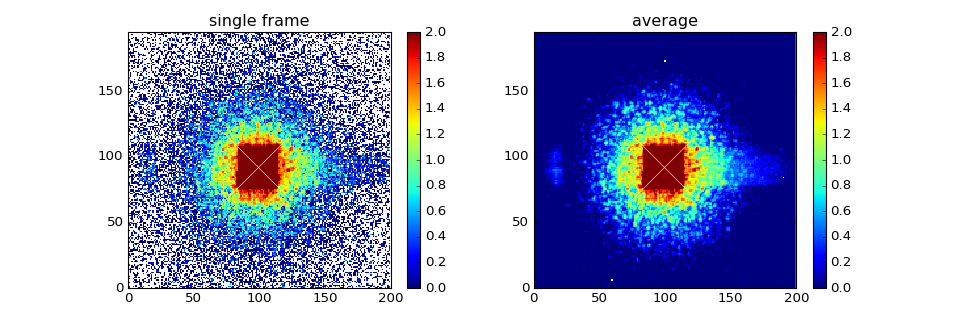

/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10
/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log10
/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log10


In [4]:
cx = (114-84)/2+84
cy = (107-77)/2+77
print cx,cy

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.imshow(np.log10(data[frame]), vmin=0, vmax=2, interpolation='None')
plt.plot(cx,cy, 'x', c='white', markersize=60)
plt.xlim(0,200)
plt.ylim(0,195)
plt.colorbar()
plt.title('single frame')

plt.subplot(1,2,2)
plt.imshow(np.log10(data_avg), vmin=0, vmax=2., interpolation='None')
plt.plot(cx,cy, 'x', c='white', markersize=60)
plt.xlim(0,200)
plt.ylim(0,195)
plt.colorbar()
plt.title('average')

plt.show()

### make mask

In [9]:
mask = np.ones(data[0].shape)
mask[data_avg<0]=0

# bad pixels
mask[6,58] = 0
mask[6,59] = 0

# mask direct beam
def circular_mask(nx=195,ny=200,center_x=92,center_y=99,radius=22):
    '''
    Creating a circular disc mask
    '''
    mask = np.ones((nx,ny),dtype=bool)

    #disk in the center
    x,y= np.mgrid[0:nx,0:ny]
    x-=center_x
    y-=center_y
    rho = np.sqrt(x**2+y**2)
    mask[rho<radius]=0

    return mask

mask *= circular_mask()

<IPython.core.display.Javascript object>


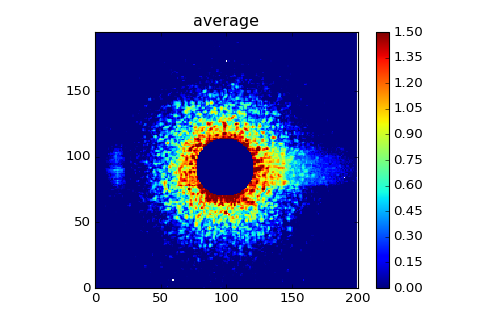

/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [10]:
plt.figure(figsize=[6,4])
plt.imshow(np.log10(data_avg)*mask, vmin=0, vmax=1.5, interpolation='None')
plt.xlim(0,200)
plt.ylim(0,195)
plt.colorbar()
plt.title('average')

### histogram

In [11]:
bi,bf,db = -10,100,1
hy,hx = np.histogram((data_avg*mask).flatten(),bins = np.arange(bi,bf,db)) 
print hy.shape

(109,)


<IPython.core.display.Javascript object>


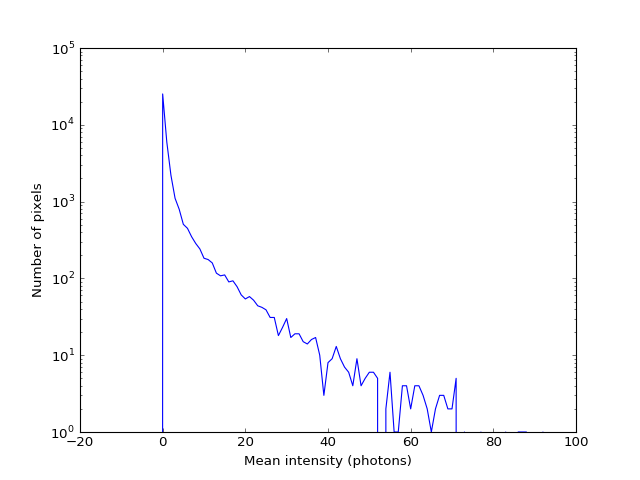

In [12]:
plt.figure()
plt.plot(hx[:-1],hy,'-',label='raw',color='blue')
plt.yscale('log',nonposy='clip')
plt.xlabel('Mean intensity (photons)')
plt.ylabel('Number of pixels')
plt.show()

<IPython.core.display.Javascript object>


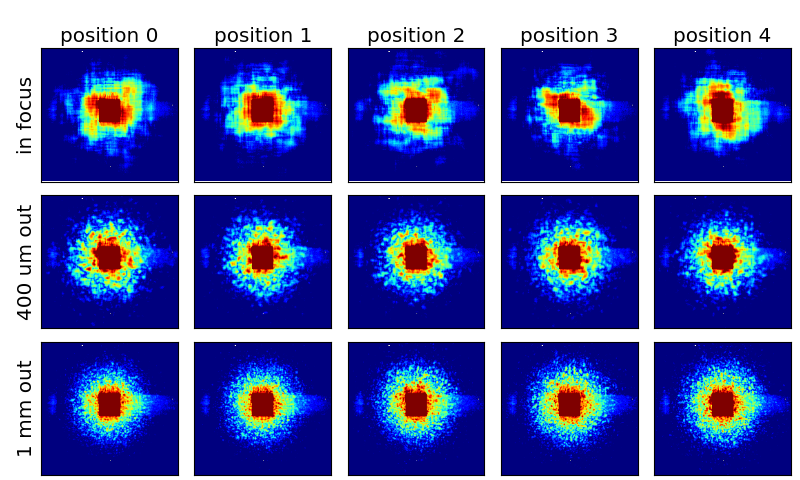

/Users/fivos/pyvos/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in log10


In [19]:
scans = (4, 10, 11)

fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(10, 6))
plt.subplots_adjust(left=.05, top=.9, bottom=.01, right=.99, hspace=.1, wspace=.1)

for i, scan in enumerate(scans):
	with h5py.File('%06u.h5' % scan, 'r') as fp:
		for ii, j in enumerate((0, 5, 10, 15, 20)):
			data = fp['entry/measurement/pilatus/%06u' % j][:, :, :200]
			data = np.mean(data, axis=0)
			ax[i, ii].imshow(np.log10(data), vmin=0, vmax=2)
			plt.setp(ax[i, ii], xticks=[], yticks=[])

for i in range(5):
	ax[0, i].set_title('position %u' % i, fontsize=18)

ax[0, 0].set_ylabel('in focus', fontsize=18)
ax[1, 0].set_ylabel('400 um out', fontsize=18)
ax[2, 0].set_ylabel('1 mm out', fontsize=18)

plt.show()
#plt.savefig('plots.png')